In [1]:
# Importing needed packages:

import pandas as pd                                          # version: 2.0.3
import nltk                                                  # version: 3.8.1
from sklearn.preprocessing import LabelEncoder               # version scikit-learn: 1.3.0
from sklearn.feature_extraction.text import CountVectorizer  # version scikit-learn: 1.3.0
from sklearn.model_selection import train_test_split         # version scikit-learn: 1.3.0
from sklearn.naive_bayes import MultinomialNB                # version scikit-learn: 1.3.0
from sklearn.metrics import confusion_matrix, roc_curve, auc # version scikit-learn: 1.3.0
import matplotlib.pyplot as plt                              # version: 3.7.2
import seaborn as sns                                        # version: 0.12.2

In [ ]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
df = pd.read_csv('Sentiment_Analysis_Ryanair_Reviews.csv')
df1 = pd.read_csv('Tweets.csv')

In [3]:
df.head()

,Number,Rating,Review
0,1,Bad,Not on time. Not to destination or back home. ...
1,2,Bad,Checkin If you are trying to verify your booki...
2,3,Bad,Terrible delays. Stealing people's time. 2 hou...
3,4,Bad,The staff members were friendly and there was ...
4,5,Bad,I took a flight from Italy to Romania and they...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Number  600 non-null    int64 
 1   Rating  600 non-null    object
 2   Review  600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

Cleaning a bit *Tweets.csv* dataset:

In [6]:
# Dropping the 'STATISTIC Label' column it's irrelevant for the analysis
sdf_col_drop = ['airline_sentiment_confidence','negativereason','negativereason_confidence','airline','airline_sentiment_gold',
               'name','negativereason_gold','retweet_count','tweet_coord','tweet_created','tweet_location','user_timezone']
df1.drop(sdf_col_drop ,axis=1, inplace=True) 
df1.head()

,tweet_id,airline_sentiment,text
0,570306133677760513,neutral,@VirginAmerica What @dhepburn said.
1,570301130888122368,positive,@VirginAmerica plus you've added commercials t...
2,570301083672813571,neutral,@VirginAmerica I didn't today... Must mean I n...
3,570301031407624196,negative,@VirginAmerica it's really aggressive to blast...
4,570300817074462722,negative,@VirginAmerica and it's a really big bad thing...


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   tweet_id           14640 non-null  int64 
 1   airline_sentiment  14640 non-null  object
 2   text               14640 non-null  object
dtypes: int64(1), object(2)
memory usage: 343.3+ KB


In [8]:
df1.groupby('airline_sentiment').describe()

tweet_id                                            \
                     count          mean           std           min   
airline_sentiment                                                      
negative            9178.0  5.692602e+17  7.572474e+14  5.675900e+17   
neutral             3099.0  5.691841e+17  8.068405e+14  5.675883e+17   
positive            2363.0  5.691006e+17  8.112476e+14  5.676555e+17   

                                                                           
                            25%           50%           75%           max  
airline_sentiment                                                          
negative           5.686511e+17  5.695355e+17  5.698798e+17  5.703106e+17  
neutral            5.684852e+17  5.693080e+17  5.699305e+17  5.703093e+17  
positive           5.684331e+17  5.691980e+17  5.698788e+17  5.703093e+17

# Encoding Ryanair Rating:

In [9]:
label_encoder = LabelEncoder()
df['Rating'] = label_encoder.fit_transform(df['Rating'])
df.groupby('Rating').describe()

Number                                                       
        count   mean        std    min     25%    50%     75%    max
Rating                                                              
0       200.0  100.5  57.879185    1.0   50.75  100.5  150.25  200.0
1       200.0  300.5  57.879185  201.0  250.75  300.5  350.25  400.0
2       200.0  500.5  57.879185  401.0  450.75  500.5  550.25  600.0

# Encoding *Tweets.csv* airline_sentiment:

In [10]:
label_encoder = LabelEncoder()
df1['airline_sentiment'] = label_encoder.fit_transform(df1['airline_sentiment'])
df1.groupby('airline_sentiment').describe()

tweet_id                                            \
                     count          mean           std           min   
airline_sentiment                                                      
0                   9178.0  5.692602e+17  7.572474e+14  5.675900e+17   
1                   3099.0  5.691841e+17  8.068405e+14  5.675883e+17   
2                   2363.0  5.691006e+17  8.112476e+14  5.676555e+17   

                                                                           
                            25%           50%           75%           max  
airline_sentiment                                                          
0                  5.686511e+17  5.695355e+17  5.698798e+17  5.703106e+17  
1                  5.684852e+17  5.693080e+17  5.699305e+17  5.703093e+17  
2                  5.684331e+17  5.691980e+17  5.698788e+17  5.703093e+17

# Vectorising Ryanair Reviews:

In [11]:
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words='english')
x = vectorizer.fit_transform(df['Review'])
y = df['Rating']

In [12]:
print(x)

  (0, 16720)	1
  (0, 4703)	1
  (0, 7923)	1
  (0, 12233)	1
  (0, 6900)	1
  (0, 11304)	1
  (0, 7136)	1
  (0, 7894)	1
  (0, 2237)	1
  (0, 8696)	1
  (0, 17829)	1
  (0, 9322)	1
  (0, 2389)	1
  (0, 10544)	1
  (0, 17863)	1
  (0, 6860)	1
  (0, 16754)	1
  (0, 4709)	1
  (0, 7932)	1
  (0, 12234)	1
  (0, 6901)	1
  (0, 11306)	1
  (0, 7144)	1
  (0, 7896)	1
  (0, 2238)	1
  :	:
  (598, 11033)	1
  (598, 16831)	1
  (598, 15169)	1
  (598, 4478)	1
  (598, 13493)	1
  (598, 16756)	1
  (599, 8696)	1
  (599, 9126)	1
  (599, 14747)	1
  (599, 9255)	1
  (599, 12372)	1
  (599, 1474)	1
  (599, 13584)	1
  (599, 9129)	1
  (599, 10729)	1
  (599, 11058)	1
  (599, 14827)	1
  (599, 4806)	1
  (599, 10786)	1
  (599, 11068)	1
  (599, 13598)	1
  (599, 8712)	1
  (599, 4807)	1
  (599, 9289)	1
  (599, 12377)	1


In [13]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
595    2
596    2
597    2
598    2
599    2
Name: Rating, Length: 600, dtype: int32


# Vectorising Airlines *Tweets.csv* :

In [14]:
vectorizer1 = CountVectorizer(ngram_range=(1,2), stop_words='english')
x1 = vectorizer1.fit_transform(df1['text'])
y1 = df1['airline_sentiment']

In [15]:
print(x1)

  (0, 94806)	1
  (0, 26789)	1
  (0, 74375)	1
  (0, 94876)	1
  (0, 26790)	1
  (1, 94806)	1
  (1, 67415)	1
  (1, 94331)	1
  (1, 6237)	1
  (1, 20861)	1
  (1, 31364)	1
  (1, 83247)	1
  (1, 95004)	1
  (1, 67458)	1
  (1, 94339)	1
  (1, 6242)	1
  (1, 20864)	1
  (1, 31463)	1
  (2, 94806)	1
  (2, 27062)	1
  (2, 86661)	1
  (2, 57507)	1
  (2, 60547)	1
  (2, 88409)	1
  (2, 94878)	1
  :	:
  (14638, 10359)	1
  (14638, 28494)	1
  (14638, 9086)	1
  (14638, 59586)	1
  (14638, 66146)	1
  (14638, 82272)	1
  (14638, 56627)	1
  (14639, 60547)	1
  (14639, 33556)	2
  (14639, 75693)	1
  (14639, 51700)	1
  (14639, 67460)	1
  (14639, 65231)	1
  (14639, 65293)	1
  (14639, 80916)	1
  (14639, 8413)	1
  (14639, 68071)	1
  (14639, 51882)	1
  (14639, 60692)	1
  (14639, 75762)	1
  (14639, 34731)	1
  (14639, 9186)	1
  (14639, 68088)	1
  (14639, 67473)	1
  (14639, 80941)	1


In [16]:
print(y1)

0        1
1        2
2        1
3        0
4        0
        ..
14635    2
14636    0
14637    1
14638    0
14639    1
Name: airline_sentiment, Length: 14640, dtype: int32


# Splitting Ryanair dataset so that 70% can be used for training and 30% for testing.

Split the dataset so that 80% can be used for training and 20% for testing.

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)
x.shape, y.shape, x_train.shape, x_test.shape, y_train.shape, y_test.shape

((600, 18550), (600,), (420, 18550), (180, 18550), (420,), (180,))

# Splitting Airlines *Tweets.csv* dataset so that 70% can be used for training and 30% for testing

In [18]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size = 0.30, random_state = 0)
x1.shape, y1.shape, x1_train.shape, x1_test.shape, y1_train.shape, y1_test.shape

((14640, 100073), (14640,), (10248, 100073), (4392, 100073), (10248,), (4392,))

## Train a Naive Bayes classifier

The next step is to train a Naive Bayes classifier. We'll use scikit-learn's [MultinomialDB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) classifier, which is ideal for datasets vectorized by `CountVectorizer`.

In [19]:
# Ryanair:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [20]:
# Airlines *Tweets.csv* :
model1 = MultinomialNB()
model1.fit(x1_train, y1_train)

MultinomialNB()

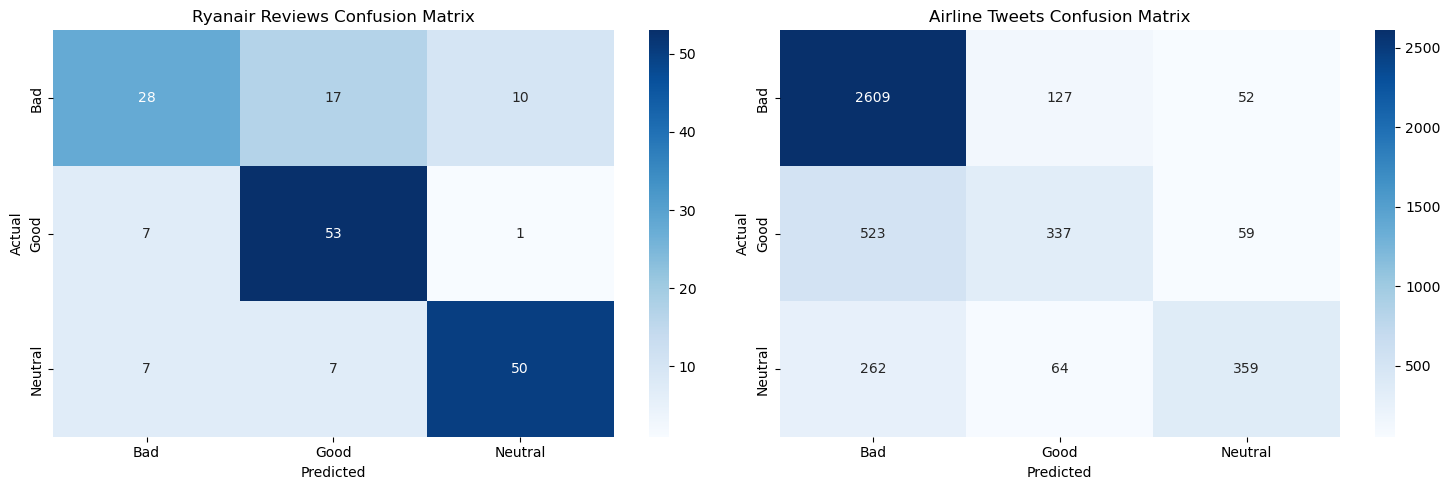

In [53]:
# Function to plot confusion matrix as a heatmap
def plot_confusion_matrix_heatmap(ax, model, x_test, y_test, labels, title):
    y_pred = model.predict(x_test)
    
    cm = confusion_matrix(y_test, y_pred, labels=labels)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Ryanair Reviews Confusion Matrix
plot_confusion_matrix_heatmap(axes[0], model, x_test, y_test, labels=[0, 1, 2], title='Ryanair Reviews Confusion Matrix')

# American and United Reviews Confusion Matrix
plot_confusion_matrix_heatmap(axes[1], model1, x1_test, y1_test, labels=[0, 1, 2], title='Airline Tweets Confusion Matrix')

# Adjusting x-axis and y-axis labels to display the specified labels
axes[0].set_xticklabels(['Bad', 'Good', 'Neutral'])
axes[0].set_yticklabels(['Bad', 'Good', 'Neutral'])
axes[1].set_xticklabels(['Bad', 'Good', 'Neutral'])
axes[1].set_yticklabels(['Bad', 'Good', 'Neutral'])

plt.tight_layout()
plt.show()

Ryanair model is correctly classifiying:<br>
**Bad:** 28 Reviews<br>
**Good:** 53 Reviews<br>
**Neutral:** 50 Reviews<br>

Airline Tweets model is correctly classifiying:<br>
**Bad:** 2609 Reviews<br>
**Good:** 337 Reviews<br>
**Neutral:** 359 Reviews<br>
Let's use the `score` method to get a rough measure of the model's accuracy.

In [54]:
a= model.score(x_test, y_test)
b = model1.score(x1_test, y1_test)
print(f'Model Accuracy Score for Ryanair: {a:.2f}')
print(f'Model Accuracy Score for Airline Tweets: {b:.2f}')

Model Accuracy Score for Ryanair: 0.73
Model Accuracy Score for Airline Tweets: 0.75


Use Scikit’s [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) class to visualize the ROC curve.

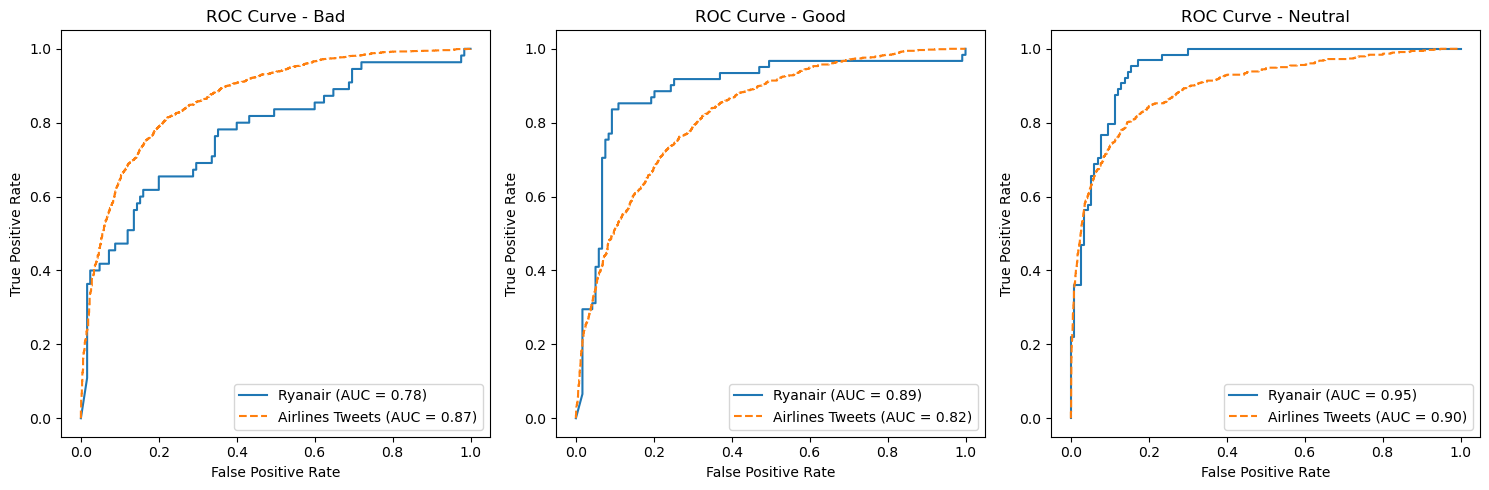

In [23]:
# ROC Curve: Receiver Operating Characteristic
# AUC: Area Under the Curve
# Assuming `model` is a trained classifier for Ryanair
# `X_test` is the test set features, and `y_test` is the true labels

# Get predicted probabilities for each class
y_score_ryanair = model.predict_proba(x_test)

# Assuming `model1` is a trained classifier Airline Tweets
# `X1_test` is the test set features, and `y1_test` is the true labels

# Get predicted probabilities for each class
y_score_Airlines_Tweets_csv = model1.predict_proba(x1_test)

# Setting num_classes 3 in this case
num_classes = 3

# Define class labels
class_labels = ['Bad', 'Good', 'Neutral']

# Plot ROC curves for each class
fig, axes = plt.subplots(nrows=1, ncols=num_classes, figsize=(15, 5))

# Plot ROC curve for Ryanair
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_test == i, y_score_ryanair[:, i])
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, label=f'Ryanair (AUC = {roc_auc:.2f})')
    axes[i].set_xlabel('False Positive Rate')
    axes[i].set_ylabel('True Positive Rate')
    axes[i].set_title(f'ROC Curve - {class_labels[i]}')
    axes[i].legend()

# Plot ROC curve for American and United
for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y1_test == i, y_score_Airlines_Tweets_csv[:, i])
    roc_auc = auc(fpr, tpr)
    
    axes[i].plot(fpr, tpr, label=f'Airlines Tweets (AUC = {roc_auc:.2f})', linestyle='--')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Bad

Ryanair:

In [24]:
msg = 'Bad and terrible experience, will not fly again with Ryanair'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [25]:
msg = 'Dirty plane, poor experience overall'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

In [26]:
msg = 'Worst company to fly with ever'
input = vectorizer.transform([msg])
model.predict(input)[0]

0

American and United:

In [27]:
msg = 'Bad and terrible experience, will not fly again with Ryanair'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

In [28]:
msg = 'Dirty plane, poor experience overall'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

In [29]:
msg = 'Worst company to fly with ever'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

# Good

Ryanair:

In [35]:
msg = 'Amazing experience flying with Ryanair, I will recommend this company!!'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [36]:
msg = 'Friendly staff, clean airplane and great snacks on board'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

In [37]:
msg = 'Great company to fly with, I highly recommend it, good value for money'
input = vectorizer.transform([msg])
model.predict(input)[0]

1

American and United:

In [38]:
msg = 'Amazing experience flying with Ryanair, I will recommend this company!!'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

In [39]:
msg = 'Friendly staff, clean airplane and great snacks on board'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

2

In [40]:
msg = 'Great company to fly with, I highly recommend it, good value for money'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

# Neutral

Ryanair:

In [41]:
msg = 'Neutral company, it gets you from point A to point B'
input = vectorizer.transform([msg])
model.predict(input)[0]

2

In [42]:
msg = 'Just another normal company to fly with'
input = vectorizer.transform([msg])
model.predict(input)[0]

2

In [43]:
msg = 'Just another normal company to fly with'
input = vectorizer.transform([msg])
model.predict(input)[0]

2

American and United:

In [44]:
msg = 'Neutral company, it gets you from point A to point B'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

In [45]:
msg = 'Just another normal company to fly with'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

In [46]:
msg = 'Just another normal company to fly with'
input = vectorizer1.transform([msg])
model1.predict(input)[0]

0

In [50]:
# Creating a df to plot the Sentiment Analysis prediction:
review = {
    'Airline': ['Ryanair', 'Airline_Tweets', 'Ryanair', 'Airline_Tweets', 'Ryanair', 'Airline_Tweets'],
    'Sentiment': ['Bad', 'Bad', 'Good', 'Good', 'Neutral', 'Neutral'],
    'Score': [3, 3, 3, 0, 3, 0]
}

review = pd.DataFrame(review)

review = pd.crosstab(review['Sentiment'], review['Airline'], values=review['Score'], aggfunc='sum', margins=False)
review

Airline,Airline_Tweets,Ryanair
Sentiment,,
Bad,3,3
Good,0,3
Neutral,0,3


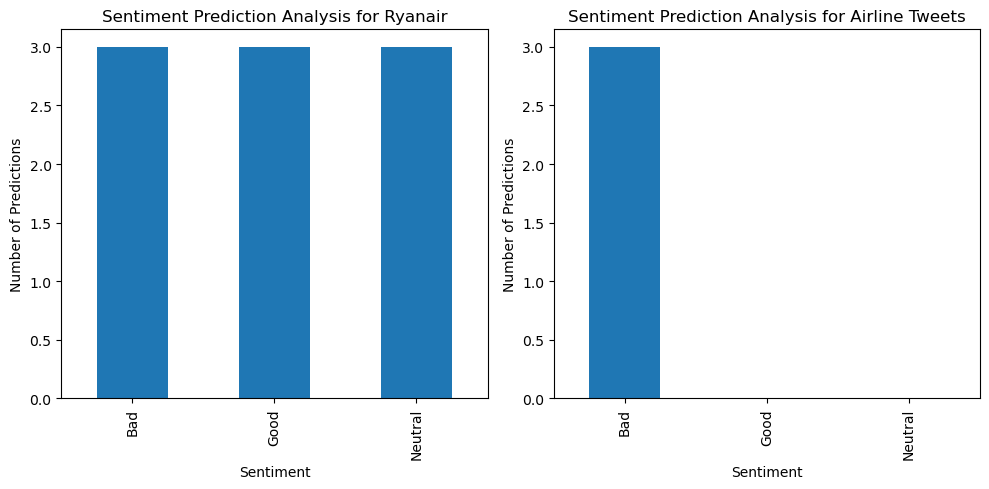

In [52]:
# Plotting histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Plot for Ryanair
review['Ryanair'].plot(kind='bar', ax=axes[0], title='Sentiment Prediction Analysis for Ryanair')
axes[0].set_ylabel('Number of Predictions')
# Plot for Airline Tweets
review['Airline_Tweets'].plot(kind='bar', ax=axes[1], title='Sentiment Prediction Analysis for Airline Tweets')
axes[1].set_ylabel('Number of Predictions')
plt.tight_layout()
plt.show()